Accuracy: 92.42%
0.04045705309102015
2.282328623765457
Accuracy power: 86.80%
0.06032945464070462
6487835823885.641


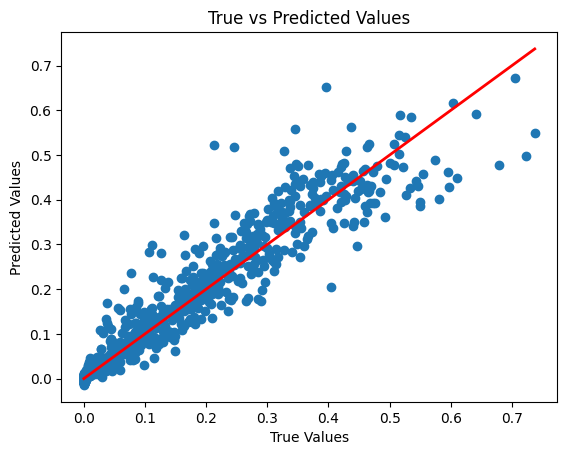

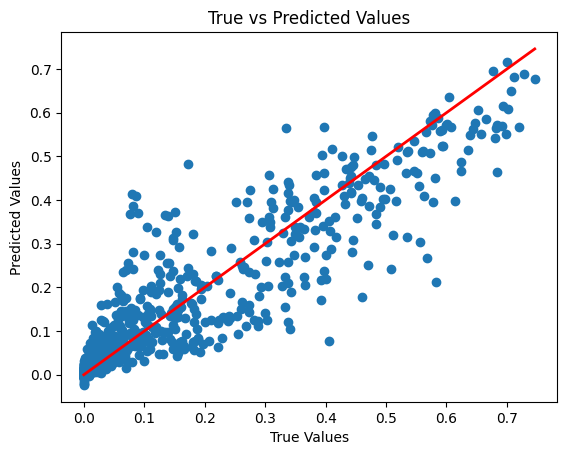

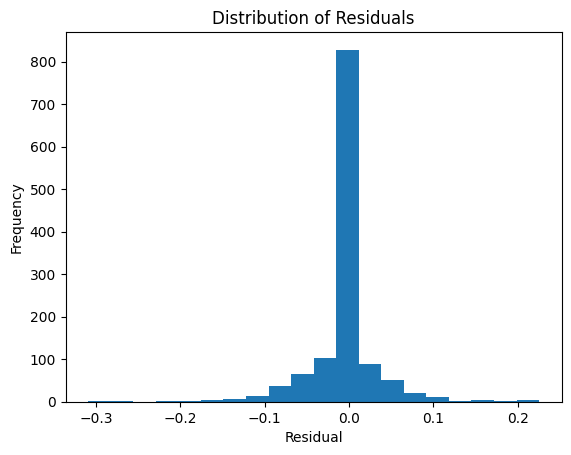

interactive(children=(IntSlider(value=0, description='index', max=1236), Output()), _dom_classes=('widget-inte…

<function __main__.plot_graph(index)>

In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

# Загрузка данных
data = pd.read_csv('selected_pv_01.csv')

# Разделение данных на признаки и целевую переменную
X = data.drop(['SolarRadiationGlobalAt0', 'SolarRadiationDirectAt0', 'SolarRadiationDiffuseAt0', 'power_normed'], axis=1)
y = data['SolarRadiationDiffuseAt0']
y_power = data['power_normed']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, shuffle=False)
X_power_train, X_power_test, y_power_train, y_power_test = train_test_split(X, y_power, test_size=0.2, random_state=123, shuffle=False)

param = {
    'learning_rate': 0.01,
    'n_estimators': 1500,
    'subsample': 0.8,
    'colsample_bytree': 1,
    'colsample_bylevel': 1,
    'min_child_weight': 20,
    'max_depth': 14,
    'objective': 'reg:squarederror'}
steps = 20  # The number of training iterations

# Создание модели
model = xgb.XGBRegressor(**param)
model_power = xgb.XGBRegressor(**param)

# Обучение модели
model.fit(X_train, y_train)
model_power.fit(X_power_train, y_power_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)
y_power_pred = model_power.predict(X_power_test)

# Вычисление точности модели
accuracy = model.score(X_test, y_test)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mape = metrics.mean_absolute_percentage_error(y_test, y_pred)

accuracy_power = model_power.score(X_power_test, y_power_test)
rmse_power = np.sqrt(metrics.mean_squared_error(y_power_test, y_power_pred))
mape_power = metrics.mean_absolute_percentage_error(y_power_test, y_power_pred)

print("Accuracy: %.2f%%" % (accuracy * 100.0))
print(rmse)
print(mape)

print("Accuracy power: %.2f%%" % (accuracy_power * 100.0))
print(rmse_power)
print(mape_power)

plt.figure()
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Radiation)')
plt.show()

plt.figure()
plt.scatter(y_power_test, y_power_pred)
plt.plot([y_power_test.min(), y_power_test.max()], [y_power_test.min(), y_power_test.max()], color='red', linewidth=2)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Power)')
plt.show()

residuals = y_test - y_pred

plt.figure()
plt.hist(residuals, bins=20)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Radiation)')
plt.show()

max_idx = len(y_pred)
hours_per_dot = 3
hours_per_day = 24
dots_per_day = int(hours_per_day / hours_per_dot)

def plot_graph(index):
    x_axis = [x * hours_per_dot for x in range(0, dots_per_day)]
    plt.plot(x_axis, y_pred[index : index + dots_per_day], label='prediction', marker='o')
    plt.plot(x_axis, y_test[index : index + dots_per_day], label='actual', marker='o')
    plt.ylabel('SolarRadiationDiffuseAt0')
    plt.ylim(0, 1)
    plt.xlabel('Hours')
    plt.legend()
    plt.show()

interact(plot_graph, index=IntSlider(min=0, max=max_idx - dots_per_day , step=1, value=0))